In [90]:
import pandas as pd
import seaborn as sns
import plotly.express as px

# check xgboost version
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np
import mlflow

import shap

1.6.2


In [57]:
# !pip install openpyxl

In [110]:
import os
os.getcwd()

'D:\\Documents\\Masters\\IITGNX - Energy Policy and Regulation\\Capstone Project\\Final Simulation'

In [111]:
FILE = r"\Data\RA_data_220816.xlsx"

In [112]:
df = pd.read_excel(os.getcwd()+FILE, engine="openpyxl")

In [113]:
df.head()

,Case ID,LCOS - exc ore,-,-.1,-.2,-.3,-.4,RE $,installation year,mean hourly solar CF,...,CoV hourly solar CF,mean monthly solar CF,median monthly solar CF,CoV monthly solar CF,mean hourly wind CF,median hourly wind CF,CoV hourly wind CF,mean monthly wind CF,median monthly wind CF,CoV monthly wind CF
0,[RE 2015] 10a-2030-S1,524.60,0,0,0,0,0,172.38,2030,0.233697,...,1.217013,170.599125,170.0625,0.095728,0.364058,0.3400,0.653778,265.762583,271.9295,0.105940
1,[RE 2015] 10a-2040-S1,474.97,0,0,0,0,0,140.51,2040,0.233697,...,1.217013,170.599125,170.0625,0.095728,0.364058,0.3400,0.653778,265.762583,271.9295,0.105940
2,[RE 2015] 10a-2050-S1,427.39,0,0,0,0,0,106.22,2050,0.233697,...,1.217013,170.599125,170.0625,0.095728,0.364058,0.3400,0.653778,265.762583,271.9295,0.105940
3,[RE 2015] 10b-2030-S1,573.05,0,0,0,0,0,174.64,2030,0.287160,...,1.163242,209.627000,213.2700,0.135638,0.309230,0.2445,0.838967,225.737750,230.8125,0.104209
4,[RE 2015] 10b-2040-S1,511.96,0,0,0,0,0,137.21,2040,0.287160,...,1.163242,209.627000,213.2700,0.135638,0.309230,0.2445,0.838967,225.737750,230.8125,0.104209


In [16]:
# float_columns = [c for c in df.columns if df[c].dtype=="float"]
# df[float_columns].describe()

In [114]:
float_columns = [c for c in df.columns if df[c].dtype=="float"]
for col in float_columns:
    print("========")
    print(col)
    print(df[col].describe())

LCOS - exc ore
count     675.000000
mean      551.429822
std        98.165077
min       394.520000
25%       481.995000
50%       531.310000
75%       598.265000
max      1134.550000
Name: LCOS - exc ore, dtype: float64
RE $
count    675.000000
mean     164.376519
std       54.512213
min       59.970000
25%      123.625000
50%      155.980000
75%      195.380000
max      365.210000
Name: RE $, dtype: float64
mean hourly solar CF
count    675.000000
mean       0.207552
std        0.054271
min        0.101277
25%        0.171174
50%        0.204847
75%        0.245419
max        0.322894
Name: mean hourly solar CF, dtype: float64
median hourly solar CF
count    675.000000
mean       0.011733
std        0.011278
min        0.000000
25%        0.003500
50%        0.008397
75%        0.016000
max        0.084000
Name: median hourly solar CF, dtype: float64
CoV hourly solar CF
count    675.000000
mean       1.332418
std        0.159571
min        1.103510
25%        1.229988
50%        1.284

In [115]:
df.isnull().sum()/len(df)

Case ID                    0.0
LCOS - exc ore             0.0
-                          0.0
-.1                        0.0
-.2                        0.0
-.3                        0.0
-.4                        0.0
RE $                       0.0
installation year          0.0
mean hourly solar CF       0.0
median hourly solar CF     0.0
CoV hourly solar CF        0.0
mean monthly solar CF      0.0
median monthly solar CF    0.0
CoV monthly solar CF       0.0
mean hourly wind CF        0.0
median hourly wind CF      0.0
CoV hourly wind CF         0.0
mean monthly wind CF       0.0
median monthly wind CF     0.0
CoV monthly wind CF        0.0
dtype: float64

In [116]:
df.corr()["LCOS - exc ore"].sort_values(ascending=False)

LCOS - exc ore             1.000000
RE $                       0.915252
CoV monthly solar CF       0.547460
CoV hourly solar CF        0.536652
CoV monthly wind CF        0.315289
CoV hourly wind CF         0.224341
median hourly solar CF    -0.308265
mean hourly wind CF       -0.320471
mean monthly wind CF      -0.320471
median monthly wind CF    -0.330536
median hourly wind CF     -0.370889
installation year         -0.494740
mean hourly solar CF      -0.551875
mean monthly solar CF     -0.551876
median monthly solar CF   -0.552996
-                               NaN
-.1                             NaN
-.2                             NaN
-.3                             NaN
-.4                             NaN
Name: LCOS - exc ore, dtype: float64

In [117]:
features = [
    "RE $",
#     "CoV monthly solar CF",
    "CoV hourly solar CF",
#     "CoV monthly wind CF",
    "CoV hourly wind CF",
    "median hourly solar CF",
    "median hourly wind CF",
    "mean hourly solar CF",
    "mean hourly wind CF"
]

target = ["LCOS - exc ore"]

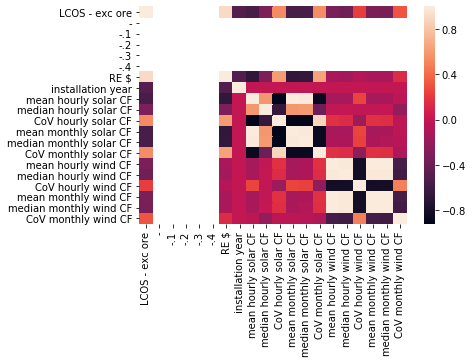

In [118]:
sns.heatmap(df.corr())

In [119]:
df.corr()["LCOS - exc ore"].sort_values(ascending=False)

LCOS - exc ore             1.000000
RE $                       0.915252
CoV monthly solar CF       0.547460
CoV hourly solar CF        0.536652
CoV monthly wind CF        0.315289
CoV hourly wind CF         0.224341
median hourly solar CF    -0.308265
mean hourly wind CF       -0.320471
mean monthly wind CF      -0.320471
median monthly wind CF    -0.330536
median hourly wind CF     -0.370889
installation year         -0.494740
mean hourly solar CF      -0.551875
mean monthly solar CF     -0.551876
median monthly solar CF   -0.552996
-                               NaN
-.1                             NaN
-.2                             NaN
-.3                             NaN
-.4                             NaN
Name: LCOS - exc ore, dtype: float64

In [120]:
features+target

['RE $',
 'CoV hourly solar CF',
 'CoV hourly wind CF',
 'median hourly solar CF',
 'median hourly wind CF',
 'mean hourly solar CF',
 'mean hourly wind CF',
 'LCOS - exc ore']

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df[features+target])

In [122]:
fig = px.scatter(df, x="CoV hourly solar CF", y="LCOS - exc ore")
# fig.show()
fig.show(renderer='iframe')

In [123]:
df[features]

,RE $,CoV hourly solar CF,CoV hourly wind CF,median hourly solar CF,median hourly wind CF,mean hourly solar CF,mean hourly wind CF
0,172.38,1.217013,0.653778,0.00975,0.34000,0.233697,0.364058
1,140.51,1.217013,0.653778,0.00975,0.34000,0.233697,0.364058
2,106.22,1.217013,0.653778,0.00975,0.34000,0.233697,0.364058
3,174.64,1.163242,0.838967,0.01600,0.24450,0.287160,0.309230
4,137.21,1.163242,0.838967,0.01600,0.24450,0.287160,0.309230
...,...,...,...,...,...,...,...
670,241.89,1.370792,0.650137,0.01250,0.18875,0.147807,0.208482
671,194.82,1.370792,0.650137,0.01250,0.18875,0.147807,0.208482
672,285.06,1.649675,0.973992,0.00100,0.16500,0.128842,0.238862
673,239.64,1.649675,0.973992,0.00100,0.16500,0.128842,0.238862


In [124]:
mmsc.fit_transform(df[features])

array([[0.36826759, 0.18601947, 0.09889589, ..., 0.69278351, 0.59751898,
        0.71892965],
       [0.26385795, 0.18601947, 0.09889589, ..., 0.69278351, 0.59751898,
        0.71892965],
       [0.15152012, 0.18601947, 0.09889589, ..., 0.69278351, 0.59751898,
        0.71892965],
       ...,
       [0.73741974, 0.89510138, 0.31842427, ..., 0.33195876, 0.1243819 ,
        0.44723933],
       [0.58861879, 0.89510138, 0.31842427, ..., 0.33195876, 0.1243819 ,
        0.44723933],
       [0.53354737, 0.89510138, 0.31842427, ..., 0.33195876, 0.1243819 ,
        0.44723933]])

In [125]:
mmsc = MinMaxScaler()
df[features] = mmsc.fit_transform(df[features])
df[features]

,RE $,CoV hourly solar CF,CoV hourly wind CF,median hourly solar CF,median hourly wind CF,mean hourly solar CF,mean hourly wind CF
0,0.368268,0.186019,0.098896,0.116071,0.692784,0.597519,0.718930
1,0.263858,0.186019,0.098896,0.116071,0.692784,0.597519,0.718930
2,0.151520,0.186019,0.098896,0.116071,0.692784,0.597519,0.718930
3,0.375672,0.097895,0.225856,0.190476,0.495876,0.838759,0.599946
4,0.253047,0.097895,0.225856,0.190476,0.495876,0.838759,0.599946
...,...,...,...,...,...,...,...
670,0.595990,0.438045,0.096399,0.148810,0.380928,0.209954,0.381312
671,0.441784,0.438045,0.096399,0.148810,0.380928,0.209954,0.381312
672,0.737420,0.895101,0.318424,0.011905,0.331959,0.124382,0.447239
673,0.588619,0.895101,0.318424,0.011905,0.331959,0.124382,0.447239


d9b5711c623c4b30a8ffceef83b3c9be
train set size: (540, 7)
test set size: (135, 7)
r2_test 0.9631956234263871
r2_train 0.9950502055209921
rmse_test 0.03192932222323933
rmse_train 0.011986424554129333
Best parameters: {'grow_policy': 'depthwise', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 0.1, 'n_estimators': 300}


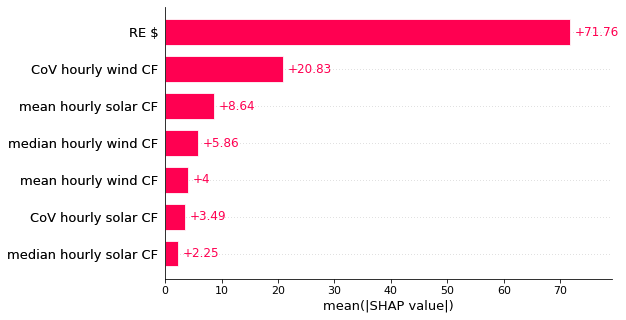

In [126]:
with mlflow.start_run(run_name="LCOS x Green Hydrogen ML Model_v6_with_feature_scaling"):
    run = mlflow.active_run()
    run_id = run.info.run_id
    print(run_id)
    RANDOM_STATE = 42
    
#     df[f"{target}_original"] = df[target]
#     df[target] = np.log(df[target])
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    print("train set size:", X_train.shape)
    print("test set size:", X_test.shape)
    
    param_grid = {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.1, 0.01, 0.05],
        'n_estimators': [50, 100, 200, 300],
        'min_child_weight': [0.1, 0.5],
        'grow_policy':['depthwise','lossguide']
        
    }
    

    model = XGBRegressor(seed=RANDOM_STATE)

    kf = KFold(n_splits = 5, random_state = RANDOM_STATE, shuffle=True)
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    predictions = grid_search.predict(X_test)
    predictions_train = grid_search.predict(X_train)
    
    r2_test  = r2_score(y_test.values.reshape(-1,1), predictions.reshape(-1,1))
    r2_train = r2_score(y_train.values.reshape(-1,1), predictions_train.reshape(-1,1))
    
    rmse_test  = np.sqrt(mean_squared_log_error(y_test.values.reshape(-1,1), predictions.reshape(-1,1)))
    rmse_train = np.sqrt(mean_squared_log_error(y_train.values.reshape(-1,1), predictions_train.reshape(-1,1)))
    
    print("r2_test", r2_test)
    print("r2_train", r2_train)
    print("rmse_test", rmse_test)
    print("rmse_train", rmse_train)
    print(f"Best parameters: {grid_search.best_params_}")
    
    mlflow.log_param("r2_test", r2_test)
    mlflow.log_param("r2_train", r2_train)
    mlflow.log_param("rmse_test", rmse_test)
    mlflow.log_param("rmse_train", rmse_train)
    mlflow.log_param("param_grid", str(param_grid))
    mlflow.log_param("best_params", str(grid_search.best_params_))
    
    mdl_path = "xgboost_mdl"
    mlflow.xgboost.log_model(grid_search.best_estimator_, mdl_path)
    
    explainer = shap.Explainer(grid_search.predict, X_test)
    shap_values = explainer(X_test)
    shap.plots.bar(shap_values)




In [127]:
features

['RE $',
 'CoV hourly solar CF',
 'CoV hourly wind CF',
 'median hourly solar CF',
 'median hourly wind CF',
 'mean hourly solar CF',
 'mean hourly wind CF']

In [109]:
y_test["LCOS - exc ore"].describe()

count     135.000000
mean      563.188741
std       110.053054
min       408.550000
25%       485.220000
50%       536.500000
75%       611.360000
max      1036.100000
Name: LCOS - exc ore, dtype: float64